# A/B Testing - Lab

## Introduction

In this lab, you'll go through the process of designing an experiment.

## Objectives
You will be able to:

* Design, structure, and run an A/B test


## The Scenario

You've been tasked with designing an experiment to test whether a new email template will be more effective for your company's marketing team. The current template has a 5% response rate (with standard deviation .0475), which has outperformed numerous other templates in the past. The company is excited to test the new design that was developed internally but nervous about losing sales if it is not to work out. As a result, they are looking to determine how many individuals they will need to serve the new email template in order to detect a 1% performance increase.


## Step 1: State the Null Hypothesis, $H_0$

State your null hypothesis here (be sure to make it quantitative as before)

In [ ]:
# H_0 = T_n (new email template) will garner 
# the same response rate as T_c (current email template)

# H_0: Response % of T_n = 5%

## Step 2: State the Alternative Hypothesis, $H_1$

State your alternative hypothesis here (be sure to make it quantitative as before)

In [ ]:
# H_1 = T_n (new email template) will garner 
# 1% more responses than T_c (current email template)

#H_1: Response % of T_n >= 6%

## Step 3: Calculate n for standard alpha and power thresholds

Now define what $\alpha$ and $\beta$ you believe might be appropriate for this scenario.
To start, arbitrarily set $\alpha$ to 0.05. From this, calculate the required sample size to detect a .01 response rate difference at a power of .8.

> Note: Be sure to calculate a normalized effect size using Cohen's d from the raw response rate difference.

In [9]:
from scipy import stats
from statsmodels.stats.power import TTestIndPower, TTestPower
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [13]:
# Calculate the required sample size
alpha = 0.05
power = 0.8
raw_effect_size = .01
cohen_d = raw_effect_size/0.0475
print(cohen_d)

power_analysis = TTestIndPower()

power_analysis.solve_power(effect_size=cohen_d, alpha=alpha, power=power)

0.21052631578947367


355.1427544342681

## Step 4: Plot Power Curves for Alternative Experiment Formulations

While you now know how many observations you need in order to run a t-test for the given formulation above, it is worth exploring what sample sizes would be required for alternative test formulations. For example, how much does the required sample size increase if you put the more stringent criteria of $\alpha=.01$? Or what is the sample size required to detect a .03 response rate difference at the same $\alpha$ and power thresholds? To investigate this, plot power vs sample size curves for alpha values of .01, .05 and .1 along with varying response rate differences of .005, .01, .02 and .03.

In [8]:
#Your code; plot power curves for the various alpha and effect size combinations

mean_diffs = np.array([.005, .01, .02, .03])
effect_sizes = mean_diffs/0.0475
effect_sizes

array([0.10526316, 0.21052632, 0.42105263, 0.63157895])

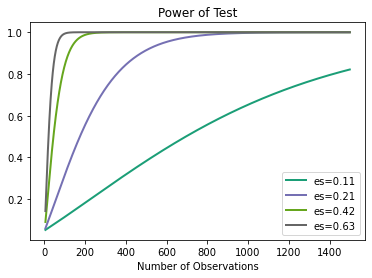

In [10]:
power_analysis.plot_power(
dep_var='nobs',
nobs = np.array(range(5,1500)),
effect_size=effect_sizes),
alpha=np.array([0.01, 0.5, 0.1])

plt.show()

## Step 5: Propose a Final Experimental Design

Finally, now that you've explored some of the various sample sizes required for statistical tests of varying power, effect size and type I errors, propose an experimental design to pitch to your boss and some of the accompanying advantages or disadvantages with it.

### Your answer here

We already know that the current email template has outperformed previous email templates we've tried, so we have reason to believe it's already good. As we test the new email template to find out if it's better, there is some risk that the new email template may actually perform worse than the current one.

To balance the risk of the new template performing worse than the current one, I propose using a sample size of 90 emails, which will be able to detect a change of of 2% in response rate at a power of 0.8 and alpha 0.05. This is a small enough sample that we're still sending the current, proven email template to most of our customers, but we have a good chance of detecting a modest change in response rate. 

If the result is positive but not significant at an effect size of 2%, we can repeat the experiment using a sample size of 355, which will have a good chance of detecting an effect size of 1% at the same power and alpha level.

## Summary

In this lab, you practiced designing an initial experiment and then refined the parameters of the experiment based on an initial sample to determine feasibility.